# FINM 25000 - Summer 2025
### Instructor: Mark Hendricks

## Homework #3

**Background Case**: Smart Beta Exchange-Traded Funds and Factor Investing

No need to study/review the entire case and all the exhibits beyond what is useful in addressing the
homework questions. But they are interesting and very informative if you are inclined.

## 1. Factor Investing 

*This section is not graded, and you do not need to submit your answers. We will discuss these issues in class.*

1. **Describe the four factors**: Market, Size, Value, and Momentum.

Market: the relative exposure of a firm's stock return with a market portfolio (i.e. the S&P 500)

Size: the size of a firm as measured by its market capitalization

Value: the ratio of a firm's book value (assets - liabilities) to its market capitalization (B/M ratio)

Momentum: stocks that have a large price appreciation in one year continue to have high price appreciation the following year and stocks with negative or lower appreciation continue to do so the following year

   - Are they constructed from portfolios going long stocks or portfolios that go long some stocks and short others?
   - - They are constructed from portfolio that go long some stocks and short others/
   - What is the point of figures 1–6?
   - - The figures provide a visual understanding of the real returns based on the provided factors.

2. How is a “smart beta” ETF different from a traditional ETF?

Smart beta ETF weighting schemes are based on firms' financial characteristics or properites of their stock returns whereas traditional ETF weightings are based on market capitalization.

3. Is it possible for all investors to invest in the Value factor?

Yes, via single stocks, factor funds, and broad market indices, every individual has he ability to invest in the Value factor.

4. How does factor investing differ from traditional diversification?

Rather than diversifying risk (covariances between stocks), factor investing intentionally exposes an investor to a certain type of risk that they deem to be an indicator of returns.

## 2. Pricing Factors and Assets

On Github, find the data files
•# factor pricing data.xlsx
Note that the FF factor labels are as follows:
- Market: MKT
- Size: SMB (Small Minus Big)
- Value: HML (High Minus Low)
- Momentum: UMD (Up Minus Down)


### 1. The Factors
Calculate their univariate performance statistics:
- mean
- volatility
- Sharpe ratio
- VaR(.05)

Does each factor have a premium (positive expected excess return)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

factors_df = pd.read_excel(io = "./factor_pricing_data.xlsx",
                                     sheet_name='factors (excess returns)',
                                     index_col=0,
                                     parse_dates=[0])

factors_df = factors_df[['MKT', 'SMB', 'HML', 'UMD']]

factors_df.head(5)

,MKT,SMB,HML,UMD
Date,,,,
1980-01-31,0.0550,0.0188,0.0185,0.0745
1980-02-29,-0.0123,-0.0162,0.0059,0.0789
1980-03-31,-0.1289,-0.0697,-0.0096,-0.0958
1980-04-30,0.0396,0.0105,0.0103,-0.0048
1980-05-31,0.0526,0.0200,0.0038,-0.0118


In [2]:
def performance_summary(rets):
    """
    This functions calculates the performance stats (mean, vol, sharpe, and VaR)
    """
    summary = pd.DataFrame()
    summary['Annualized Mean'] = rets.mean() * 12
    summary['Annualized Volatility'] = rets.std() * np.sqrt(12)
    summary['Annualized Sharpe Ratio'] = summary['Annualized Mean'] / summary['Annualized Volatility']
    summary['VaR (0.05)'] = rets.quantile(q = 0.05, axis = 'index')
    return summary

performance_summary(factors_df).T

,MKT,SMB,HML,UMD
Annualized Mean,0.084944,0.005420,0.026508,0.061769
Annualized Volatility,0.156374,0.101365,0.108907,0.153524
Annualized Sharpe Ratio,0.543210,0.053469,0.243402,0.402343
VaR (0.05),-0.072470,-0.043155,-0.042210,-0.068035


### 2. Factor Correlations
The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors.
- Does the construction method succeed in keeping correlations small?

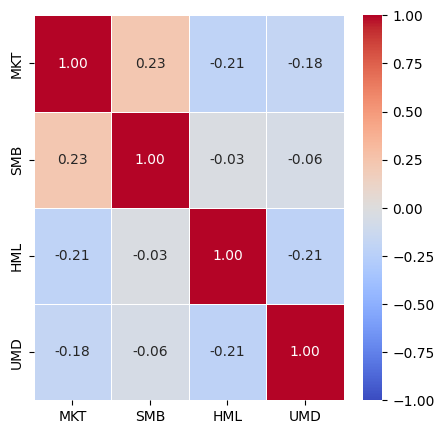

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(factors_df.corr(), 
            cmap='coolwarm',
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=0.7,
            fmt='.2f');

Yes, the construction method succeeds in keeping correlations small. The highest correlation is 0.23 while the lowest is -0.21.

### 3. Cumulative Returns
Plot the cumulative returns of the factors.

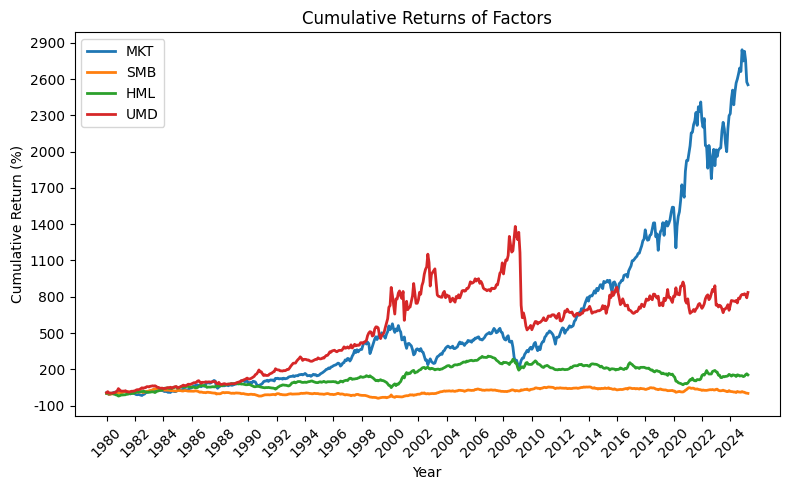

In [4]:
cum_factors_rets = (1 + factors_df).cumprod() - 1

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(cum_factors_rets.index, cum_factors_rets, lw=2)

# Add a legend.
ax.legend(cum_factors_rets.columns, loc="upper left")

# Make xticks every year and format them as years.
ax.set_xticks(cum_factors_rets.index[::24])
ax.set_xticklabels(cum_factors_rets.index[::24].year, rotation=45)
ax.set_yticks(np.arange(-1, 30, 3))
ax.set_yticklabels(["{:d}".format(x * 100) for x in ax.get_yticks()])
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Cumulative Returns of Factors")
fig.tight_layout()

The market factor performs the best by a wide margin followed by momemtum, value, and size.

### 4. Test Assets
The “assets” tab provides monthly excess return data on various industry stock-portfolios.
Denote these as $r^i$, for n = 1, . . . , 12.
Calculate the (annualized) univariate statistics from 1.1.


In [5]:
# Insert your code here to calculate test asset statistics

portfolios_df = pd.read_excel(io = "./factor_pricing_data.xlsx",
                                     sheet_name='portfolios (excess returns)',
                                     index_col=0,
                                     parse_dates=[0])

display(portfolios_df.head(5))

portfolio_summary = performance_summary(portfolios_df).T
display(portfolio_summary)

#fig, ax = plt.subplots(figsize=(20, 20))

#ax = sns.heatmap(
#    portfolios_df.corr(), 
#    cmap='coolwarm',
#    annot=True,
#    vmin=-1,
#    vmax=1,
#    fmt='.2f',
#    linewidths=0.5,
#    linecolor='white',
#    cbar_kws={'shrink': 0.7},
#    annot_kws={'fontsize':6,'color': 'black'})

#ax.tick_params(axis='x', labelsize=10, rotation=45)
#ax.tick_params(axis='y', labelsize=10)

#ax.set_title('Correlation Matrix for Portfolios', fontsize=14)
#display(ax)


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0073,0.0285,0.0084,0.1009,-0.0143,0.0995,0.0348,0.0323,0.0048,0.0059,...,0.0158,0.0851,0.0466,-0.0125,0.0430,-0.0284,0.0254,0.0770,0.0306,0.0666
1980-02-29,0.0125,-0.0609,-0.0967,-0.0323,-0.0575,-0.0316,-0.0492,-0.0803,-0.0556,-0.0169,...,-0.0083,-0.0543,-0.0345,-0.0641,-0.0653,-0.0824,-0.0960,-0.0352,-0.0283,-0.0273
1980-03-31,-0.2220,-0.1119,-0.0158,-0.1535,-0.0188,-0.1272,-0.0827,-0.1238,-0.0567,-0.0670,...,-0.0819,-0.1512,-0.1602,-0.0905,-0.1450,-0.0559,-0.0877,-0.2449,-0.1261,-0.1737
1980-04-30,0.0449,0.0767,0.0232,0.0289,0.0830,-0.0529,0.0785,0.0154,0.0305,0.0115,...,0.0422,-0.0102,0.0268,0.0355,0.0539,0.0736,0.0528,0.0964,0.0458,0.0784
1980-05-31,0.0635,0.0797,0.0458,0.0866,0.0822,0.0510,0.0325,0.0888,0.0560,0.0098,...,0.0564,0.1065,0.1142,0.0877,0.1104,0.0570,0.0560,0.0889,0.0846,0.0663


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Annualized Mean,0.090492,0.091434,0.107166,0.106462,0.139915,0.058412,0.123368,0.068678,0.077151,0.087042,...,0.088899,0.086045,0.085672,0.113451,0.099935,0.092012,0.094765,0.052189,0.113378,0.057015
Annualized Volatility,0.216219,0.149871,0.218976,0.170226,0.223470,0.246793,0.265573,0.206901,0.153228,0.226623,...,0.199184,0.200664,0.180551,0.186824,0.180939,0.214346,0.181358,0.250410,0.222876,0.209725
Annualized Sharpe Ratio,0.418519,0.610083,0.489398,0.625419,0.626101,0.236683,0.464537,0.331936,0.503504,0.384083,...,0.446317,0.428800,0.474502,0.607261,0.552316,0.429267,0.522527,0.208414,0.508704,0.271858
VaR (0.05),-0.088570,-0.059965,-0.092900,-0.066550,-0.091665,-0.106830,-0.109310,-0.086435,-0.068040,-0.101655,...,-0.089540,-0.088635,-0.078275,-0.080995,-0.074625,-0.094165,-0.078610,-0.099190,-0.103840,-0.095270


### 5. Mean-Variance Explanation
Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

In [6]:
Y = portfolio_summary.loc['Annualized Mean']
X1 = portfolio_summary.loc['Annualized Volatility']
X2 = portfolio_summary.loc['VaR (0.05)']

results1 = sm.OLS(Y, sm.add_constant(X1)).fit()
results2 = sm.OLS(Y, sm.add_constant(X2)).fit()

display(results1.summary())
display(results2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Annualized Mean   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.315
Date:                Thu, 10 Jul 2025   Prob (F-statistic):              0.257
Time:                        20:27:48   Log-Likelihood:                 122.89
No. Observations:                  49   AIC:                            -241.8
Df Residuals:                      47   BIC:                            -238.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1037      0.013      7.927      0.000       0.077       0.130
Annualized Volatility    -0.0646      0.056     -1.147      0.257      -0.178       0.049
==============================================================================
Omnibus:                        2.832   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.139
Skew:                           0.507   Prob(JB):                        0.343
Kurtosis:                       3.138   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Annualized Mean   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.111
Date:                Thu, 10 Jul 2025   Prob (F-statistic):             0.0843
Time:                        20:27:48   Log-Likelihood:                 123.79
No. Observations:                  49   AIC:                            -243.6
Df Residuals:                      47   BIC:                            -239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.013      8.547      0.000       0.085       0.138
VaR (0.05)     0.2333      0.132      1.764      0.084      -0.033       0.499
==============================================================================
Omnibus:                        3.547   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.692
Skew:                           0.561   Prob(JB):                        0.260
Kurtosis:                       3.246   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No.

Regarding volatilities, only 0.7% of the variation of mean excess returns can be explained by volatility of those portfolios. Additionally, only 4.2% of the variation of the mean excess returns can be explain by VaR (0.05).

(Via adjusted R-squared)

## 3. CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, $\tilde{r}^i$, its mean is proportional to the mean excess return of the market, $\tilde{f}^{\text{mkt}}$, where the proportionality is the regression beta of $\tilde{r}^i$ on $\tilde{f}^{\text{mkt}}$:

$$
\mathbb{E}[\tilde{r}^i_t] = \beta^{i, \text{mkt}} \, \mathbb{E}[\tilde{f}^{\text{mkt}}_t] \tag{CAPM}
$$

Let’s examine whether that seems plausible.

### 1. Time-Series Regression
For each of the n = 12 test assets, run the CAPM time-series regression:

$$\tilde{r}_i^t = \alpha_i + \beta_{i,\text{mkt}} \tilde{f}_{\text{mkt}}^t + \epsilon_i^t $$

So you are running 12 separate regressions, each using the T-sized sample of time-series data.

In [7]:
def univariate_regression(funds, explanatory):
    """
    Function is designed to calculate the univariate regression of y against X.
    Can also do downside beta (when market < 0) and upside beta (when market > 0)

    Returns:
        DataFrame: Summary of results
    """
    reg_results = []
    for fund in funds.columns:
      response = funds[fund]
        # set-up of Ordinary Least Sqaured Regression (drop missing values & add constant for regression)
      results = sm.OLS(response, sm.add_constant(explanatory), missing = 'drop').fit()

      # constant and slope of explanatory variable (index 0 and 1 respectively)
      parameters = results.params

      intercept = parameters.iloc[0] # returns in excess of the market
      beta = parameters.iloc[1]

      summary = dict()

      summary['Alpha'] = intercept * 12
      summary['Beta'] = beta

      summary['R-Squared'] = results.rsquared

      # normalize returns by the amount of market risk being taken on
      summary['Treynor Ratio'] = (response.mean() / beta) * 12 # annualize the ratio

      residuals = results.resid

      #returns in excess of the market penalized by the variance of the regression
      summary['Information Ratio'] = (intercept / residuals.std()) * np.sqrt(12) #annualize the ratio

      reg_results.append(pd.DataFrame(summary, index = [response.name]))
    return pd.concat(reg_results)

capm_regr = univariate_regression(portfolios_df, factors_df['MKT'])

### 2. Report Metrics
Report the estimated $\beta_{i,\text{mkt}}$, Treynor Ratio, $\alpha_i$, and Information Ratio for each of the n regressions 

In [8]:
# Insert your code here to calculate and display the metrics
display(capm_regr)

,Alpha,Beta,R-Squared,Treynor Ratio,Information Ratio
Agric,0.022874,0.796025,0.331432,0.113680,0.129384
Food,0.042560,0.575366,0.360399,0.158914,0.355082
Soda,0.047979,0.696773,0.247584,0.153804,0.252598
Beer,0.053355,0.625208,0.329860,0.170283,0.382882
Smoke,0.087968,0.611540,0.183123,0.228791,0.435539
Toys,-0.035952,1.110894,0.495463,0.052581,-0.205091
Fun,0.012731,1.302473,0.588169,0.094719,0.074700
Books,-0.022408,1.072299,0.656805,0.064047,-0.184868
Hshld,0.018782,0.687143,0.491758,0.112278,0.171937
Clths,-0.005091,1.084627,0.560126,0.080251,-0.033870


### 3
If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

If the CAPM were true, that the CAPM model holds true via a no arbitrage argument. In other words, there should be no alpha when regressing the market return against the portfolio returns. As a result, the Information Ratios for each asset should always be zero since its equation is alpha divided by standard deviation of residuals. Lastly, if the CAPM were true, than the Treynor Ratios should all be the same since it theoretically should yield the expected return of the market (via the CAPM equation).

### 4 
Calculate the mean-absolute-error of the estimated alphas, (one for each security $\tilde{r^i})$. 

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [9]:
alphas = capm_regr['Alpha']

n = len(alphas)

mae = sum(abs(alphas)) / n

print(f"Mean-Absolute-Error of Alphas: {mae:.4f}")

Mean-Absolute-Error of Alphas: 0.0214


If the pricing model worked and CAPM truly yielded no-arbitrage returns then alphas should be zero. However, the mean absolute error of the estimated alphas was 2.14% which means that on average the CAPM yield an annualized return that varied by more than 2% for each asset, too much for comfort!

## 4. A Multifactor Model 
Perhaps expected excess returns are determined by multiple factors, not just the market factor as hypothesized by the CAPM. Try the following 4-factor model: 

$$
\mathbb{E}[\tilde{r}^i] = \beta^{i,\text{mkt}} \, \mathbb{E}[\tilde{f}^{\text{mkt}}] + \beta^{i,\text{smb}} \, \mathbb{E}[\tilde{f}^{\text{smb}}] + \beta^{i,\text{hml}} \, \mathbb{E}[\tilde{f}^{\text{hml}}] + \beta^{i,\text{umd}} \, \mathbb{E}[\tilde{f}^{\text{umd}}]
$$

Let’s use regression methods to test whether the selected four pricing factors work.
For each equity security, estimate the following regression to test the 4-factor model:
$$
\tilde{r}^i_t = \alpha^i + \beta^{i,\text{mkt}} \tilde{f}^{\text{mkt}}_t + \beta^{i,\text{smb}} \tilde{f}^{\text{smb}}_t + \beta^{i,\text{hml}} \tilde{f}^{\text{hml}}_t + \beta^{i,\text{umd}} \tilde{f}^{\text{umd}}_t + \epsilon_t
$$
So you are running that regression 12 times, once for each security $\tilde{r^i}$

### 1. Time-Series Regression (Four-Factor Model)
For each regression, report the estimated $\alpha$ and r-squared. 

In [10]:
def multivariate_regression(responses, explanatory):
    """
    Function is designed to calculate the multivariate regression of y against X.
    Can also do downside beta (when market < 0) and upside beta (when market > 0)

    Args:
    funds: a dataframe with the target variables
    explanatory: a dataframe with the explanatory variables
    Returns:
        DataFrame: Summary of results
    """
    df = pd.DataFrame()
    for response in responses.columns:
        results = sm.OLS(responses[response], sm.add_constant(explanatory), missing = 'drop').fit()

        # constant and slope of explanatory variable (index 0 and 1 respectively)
        parameters = results.params

        intercept = parameters.iloc[0] # returns in excess of the market (annualized)
        betas = parameters.iloc[1:] #exclude first var. as it's the intercept

        summary = dict()
        summary['Alpha'] = intercept * 12

        summary['R-Squared'] = results.rsquared

        #residuals = results.resid
        #summary['Tracking Error'] = residuals.std() * np.sqrt(12)

        explanatory_vars = explanatory.columns

        for i, col in enumerate(explanatory_vars):
            summary[f"{col} Beta"] = betas.iloc[i]

        df = pd.concat([df, pd.DataFrame(summary, index = [response])])
    return df

four_factor_model = multivariate_regression(portfolios_df, factors_df)

display(four_factor_model)

,Alpha,R-Squared,MKT Beta,SMB Beta,HML Beta,UMD Beta
Agric,0.011808,0.359185,0.791785,0.301242,0.182529,0.080225
Food,0.026087,0.413750,0.656878,-0.223538,0.261829,0.061846
Soda,0.040690,0.277489,0.751587,-0.170412,0.285569,-0.064971
Beer,0.037700,0.366912,0.704059,-0.270393,0.135595,0.110539
Smoke,0.071216,0.231940,0.710423,-0.303600,0.374529,0.001126
Toys,-0.021828,0.537074,1.020470,0.448321,0.015588,-0.150343
Fun,0.037109,0.616750,1.209490,0.249739,-0.078980,-0.254820
Books,-0.025940,0.694687,1.069668,0.198685,0.279954,-0.076767
Hshld,0.011465,0.511518,0.734540,-0.199910,0.079221,0.036823
Clths,0.004789,0.585434,1.045750,0.172113,0.115659,-0.171219


### 2
Calculate the mean-absolute-error of the estimated alphas (one for each security, $\tilde{r}^i$):

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [11]:
alphas = four_factor_model['Alpha']

n = len(alphas)

mae = sum(abs(alphas)) / n

print(f"Mean-Absolute-Error of Alphas: {mae:.4f}")

Mean-Absolute-Error of Alphas: 0.0224


Once again, if the four-factor pricing model worked then the alphas should be zero. However, the mean absolute error of the estimated alphas was 2.24% which means that on average the CAPM yield an annualized return that varied by more than 2% for each asset, too much for comfort!

## 5. Extensions *(Ungraded)*

This section is not graded, and you do not need to submit your answers. This is only provided for those interested in further study.



### 1. Pricing Factors and Mean-Variance Optimality

The Fundamental Theorem of Asset Pricing says that these priced factors are sufficient to construct the Tangency Portfolio. Let’s examine both of those implications for the excess returns of the 4 factors, $\tilde{f}^i$, as tested on the industry equity excess returns $\tilde{r}^i$.

(a) Use the “RF” factor in the Fama-French data to convert both the factor data and the equity data into excess returns.

(b) Report the mean excess return for the four factors. Are they all strongly positive? If one of the means is negative, what would that say about the pricing model?

(c) Report the correlation matrix of the four factors’ excess returns.

(d) Use both the equity data, $\tilde{r}$, and factor data, $\tilde{f}$, to construct the tangency portfolio weights.  
Report the weights.

(e) Is much weight put on the equity data, or is most of the weight on the factors?

(f) If the factors were sufficient for pricing, what should we find?







### 2. Testing Pricing Models with Cross-Sectional Regression

Let’s further evaluate whether the pricing model in (1) works. Instead of evaluating the alphas from the time-series regressions, we try to directly estimate (1). Run the following cross-sectional regression:

$$
\bar{r}^i_t = \theta + \phi^{\text{mkt}} \hat{\beta}^{i,\text{mkt}} + \phi^{\text{smb}} \hat{\beta}^{i,\text{smb}} + \phi^{\text{hml}} \hat{\beta}^{i,\text{hml}} + \phi^{\text{umd}} \hat{\beta}^{i,\text{umd}} + \nu^i \tag{3}
$$

This may seem like a strange regression, but it is the estimated version of (1).

- It is a cross-sectional regression, not a time-series regression. That is, we are running one single regression, with 12 data points, one for each security.

- The left-side variable is the sample average of each equity’s excess return, $\bar{r}^i$.

- The right-side regressors are the estimated betas (12 sets of them) from the previous (12) time-series regressions.

- The errors, usually denoted $\epsilon_t$ are now $\nu^i$, (one for each security.)

- This regression will return an intercept, which we are calling $\theta$. Usually we call the regression intercept $\alpha$, but that would be confusing given that we used $\alpha$ to denote the intercepts of the time series regressions.

- This regression will return regression “betas” that we are notating $\phi$. So in this regression, $X$ is actually the estimates betas from the time-series regressions in (2) and $\beta$ is actually $\phi$.

<sub>¹excluding SHV, since we already have a risk-free rate.</sub>

Report the r-squared from (3). Also report the estimate for θ and for the four ϕ





### 3 

If the pricing model worked, what would we expect for this r-squared, θ, and ϕ?

### 4 

Is your conclusion that this model seems to work, or not?

### 5 

Would you expect a linear factor pricing model to work better on an industry ETF, (portfolio,) or on a single-name equity?
